Use decision trees to prepare a model on fraud data 
treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn import tree
from sklearn.tree import  DecisionTreeClassifier

In [ ]:
data=pd.read_csv("/content/Fraud_check.csv")
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [ ]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


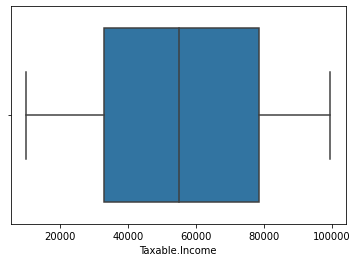

In [ ]:
sns.boxplot(data["Taxable.Income"])
plt.show()

In [ ]:
df=data.copy()

In [ ]:
list(df.columns)

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

In [ ]:
#df=pd.get_dummies(df,columns=['Undergrad','Marital.Status','Urban'])
df

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,68833,50047,10,1,0,0,0,1,0,1
1,33700,134075,18,0,1,1,0,0,0,1
2,36925,160205,30,1,0,0,1,0,0,1
3,50190,193264,15,0,1,0,0,1,0,1
4,81002,27533,28,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...
595,76340,39492,7,0,1,1,0,0,0,1
596,69967,55369,2,0,1,1,0,0,0,1
597,47334,154058,0,1,0,1,0,0,0,1
598,98592,180083,17,0,1,0,1,0,1,0


In [ ]:
df.corr()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
Taxable.Income,1.000000,-0.064387,-0.001818,0.049232,-0.049232,0.062099,-0.100611,0.037910,-0.070628,0.070628
City.Population,-0.064387,1.000000,0.013135,-0.079579,0.079579,0.004925,-0.007035,0.002087,0.040098,-0.040098
Work.Experience,-0.001818,0.013135,1.000000,0.005362,-0.005362,-0.014833,0.033347,-0.018123,0.094559,-0.094559
Undergrad_NO,0.049232,-0.079579,0.005362,1.000000,-1.000000,0.045101,-0.015120,-0.028883,-0.000267,0.000267
Undergrad_YES,-0.049232,0.079579,-0.005362,-1.000000,1.000000,-0.045101,0.015120,0.028883,0.000267,-0.000267
Marital.Status_Divorced,0.062099,0.004925,-0.014833,0.045101,-0.045101,1.000000,-0.468757,-0.510435,0.065518,-0.065518
Marital.Status_Married,-0.100611,-0.007035,0.033347,-0.015120,0.015120,-0.468757,1.000000,-0.520317,-0.016771,0.016771
Marital.Status_Single,0.037910,0.002087,-0.018123,-0.028883,0.028883,-0.510435,-0.520317,1.000000,-0.047014,0.047014
Urban_NO,-0.070628,0.040098,0.094559,-0.000267,0.000267,0.065518,-0.016771,-0.047014,1.000000,-1.000000
Urban_YES,0.070628,-0.040098,-0.094559,0.000267,-0.000267,-0.065518,0.016771,0.047014,-1.000000,1.000000


In [ ]:
df["Taxable.Income"]=df["Taxable.Income"].apply(lambda x: "Risky" if x<=30000 else "Good")

In [ ]:
df.head()

,Taxable.Income,City.Population,Work.Experience,Undergrad_NO,Undergrad_YES,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,Urban_NO,Urban_YES
0,Good,50047,10,1,0,0,0,1,0,1
1,Good,134075,18,0,1,1,0,0,0,1
2,Good,160205,30,1,0,0,1,0,0,1
3,Good,193264,15,0,1,0,0,1,0,1
4,Good,27533,28,1,0,0,1,0,1,0


In [ ]:
df["Taxable.Income"].value_counts()

Good     476
Risky    124
Name: Taxable.Income, dtype: int64

In [ ]:
X=df.iloc[:,1:]
y=df.iloc[:,0]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [ ]:
y_train.value_counts()

Good     374
Risky    106
Name: Taxable.Income, dtype: int64

In [ ]:
DTC=DecisionTreeClassifier(criterion="entropy")

In [ ]:
model=DTC.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
train_pred=model.predict(X_train)

In [ ]:
accuracy_score(y_train,train_pred)

1.0

In [ ]:
accuracy_score(y_test,y_pred)

0.6

In [ ]:
confusion_matrix(y_test,y_pred)

array([[68, 34],
       [14,  4]])

In [35]:
features=list(df.columns)
cn=list(df["Taxable.Income"].unique())

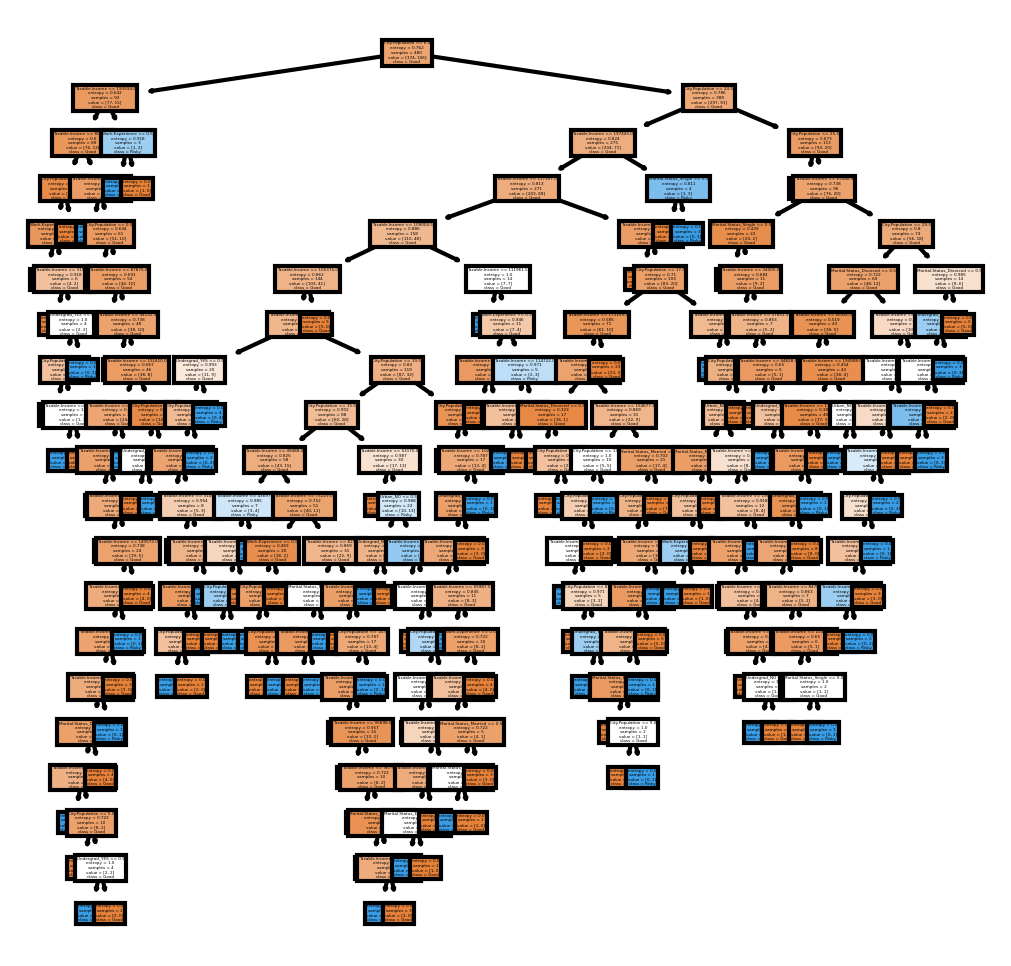

In [36]:
fig,axes=plt.subplots(1,1,figsize=(4,4),dpi=300)
tree.plot_tree(model,feature_names=features,class_names=cn,filled=True)
plt.show()

In [37]:
model.feature_importances_

array([0.54468489, 0.20317989, 0.03774775, 0.02953078, 0.05688327,
       0.04948394, 0.02072324, 0.04236622, 0.01540002])

In [39]:
fi = pd.DataFrame({'Feature': list(X_train.columns),
                   'Importance': model.feature_importances_}).\
                    sort_values('Importance', ascending = False)
fi.head()

,Feature,Importance
0,City.Population,0.544685
1,Work.Experience,0.203180
4,Marital.Status_Divorced,0.056883
5,Marital.Status_Married,0.049484
7,Urban_NO,0.042366


## **Conclusion:** As seen in the confusion matrix of Test data 72 instances are presdected correctly and 48 instances are not.